In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Cins və yaş qrupları üzrə ölənlərin sayı (Şəhər və kənd)

In [111]:
def process_dataframe_4_1(df):
    # İstənilən satırları və sütunları silmək
    df.drop([0, 1, 2, 3, 4, 6, 8], inplace=True)
    df.drop('Unnamed: 0', axis=1, inplace=True)
    
    # İstənilən hüceyrəni dəyişmək
    df.iloc[0, 0] = 'İl'
    
    # Sütunu indeksə çevirmək və dataframe-i transpozisiya etmək
    df_new = df.set_index('Unnamed: 1').T
    df_new = df_new.reset_index(drop=True)
    df_new.index.name = None
    
    # Veriləri təmizləmək və növünü dəyişmək
    df_new = df_new.replace('.0', '').astype(int)
    
    # Yeni 'Cins' sütunu yaratmaq
    df_new['Cins'] = np.where(df_new.index < 34, 'Hər ikisi',
                              np.where((df_new.index >= 34) & (df_new.index < 68), 'Kişi', 'Qadın'))
    
    # Dataframe-i shuffle etmək
    df_new = df_new.sample(frac=1).reset_index(drop=True)

    df_new.rename(columns={0: '0 yaş'}, inplace=True)
    
    return df_new

In [112]:
cins_yas_say = pd.read_excel('Cins və yaş qrupları üzrə ölənlərin sayı.xls',sheet_name = '4_1')

In [113]:
cins_yas_say_pro = process_dataframe_4_1(cins_yas_say)

In [114]:
cins_yas_say_pro

Unnamed: 1,İl,Cəmi,0 yaş,1-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85 və yuxarı,Cins
0,2003,23438,718,383,191,147,162,194,206,283,427,634,716,785,720,1797,3243,3931,3171,2243,3487,Qadın
1,2018,30643,892,173,128,140,209,299,380,475,529,860,1346,2210,3414,3785,3407,2238,3422,3866,2870,Kişi
2,1996,48242,2685,2396,507,318,534,781,897,1288,1542,1509,1686,1461,4102,5450,6405,4488,3239,3449,5505,Hər ikisi
3,2006,52248,1882,619,219,251,496,611,662,785,1141,1678,2508,2671,3112,2618,7124,8597,8011,4602,4661,Hər ikisi
4,2005,27474,893,336,255,223,320,404,451,662,826,1293,1721,1801,1848,1817,4274,4289,3601,1414,1046,Kişi
5,1994,54921,4180,3044,554,421,1546,2178,1806,1792,1592,1515,1339,2106,4634,5626,5616,3878,3274,4289,5531,Hər ikisi
6,2021,36617,364,126,92,79,124,142,208,295,415,541,905,1566,2705,4060,4463,4353,2977,6475,6727,Qadın
7,1998,21620,871,903,233,136,166,205,288,376,446,502,524,460,1135,2187,2877,2625,2127,1909,3650,Qadın
8,1991,44659,4749,2892,513,272,423,621,868,1077,1013,1083,986,2902,3853,4725,3559,2939,3792,3634,4758,Hər ikisi
9,2017,30429,993,212,135,112,213,292,419,489,621,855,1452,2368,3487,3627,3333,2002,3928,3598,2293,Kişi


In [115]:
cins_yas_say_pro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   İl            102 non-null    int32 
 1   Cəmi          102 non-null    int32 
 2   0 yaş         102 non-null    int32 
 3   1-4           102 non-null    int32 
 4   5-9           102 non-null    int32 
 5   10-14         102 non-null    int32 
 6   15-19         102 non-null    int32 
 7   20-24         102 non-null    int32 
 8   25-29         102 non-null    int32 
 9   30-34         102 non-null    int32 
 10  35-39         102 non-null    int32 
 11  40-44         102 non-null    int32 
 12  45-49         102 non-null    int32 
 13  50-54         102 non-null    int32 
 14  55-59         102 non-null    int32 
 15  60-64         102 non-null    int32 
 16  65-69         102 non-null    int32 
 17  70-74         102 non-null    int32 
 18  75-79         102 non-null    int32 
 19  80-84   

# Cins və yaş qrupları üzrə ölənlərin sayı (Şəhər)

In [117]:
cins_yas_say_seher = pd.read_excel('Cins və yaş qrupları üzrə ölənlərin sayı.xls',sheet_name = '4_1sheher')

In [118]:
cins_yas_say_seher_pro = process_dataframe_4_1(cins_yas_say_seher)

In [119]:
cins_yas_say_seher_pro

Unnamed: 1,İl,Cəmi,0 yaş,1-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85 və yuxarı,Cins
0,2016,31385,1380,235,143,90,179,299,299,377,441,643,1064,1978,3019,3347,3334,2314,4819,4110,3314,Hər ikisi
1,2021,45183,461,171,134,128,224,269,392,548,718,1003,1547,2548,4284,6224,6420,5855,3436,5917,4904,Hər ikisi
2,2022,19103,272,87,82,74,119,197,219,333,432,558,846,1233,2009,2882,2813,2376,1279,1812,1480,Kişi
3,2023,18951,715,93,81,84,170,178,219,315,427,561,796,1199,1946,2922,2852,2394,1268,1359,1372,Kişi
4,1995,11774,603,261,76,76,92,133,150,223,258,259,271,311,847,1030,1462,1330,1194,1500,1698,Qadın
5,2005,14822,464,51,107,106,173,217,248,396,480,823,1095,1136,1224,1111,2252,2061,1730,669,479,Kişi
6,1998,12882,521,295,129,87,164,248,252,401,586,615,825,656,1113,1860,1913,1549,625,484,559,Kişi
7,1990,21804,1656,623,144,107,209,316,445,541,596,662,664,1619,1931,2599,1977,1644,2451,1942,1678,Hər ikisi
8,2011,28567,1536,135,84,89,209,329,384,442,496,810,1395,2156,2431,2454,1817,4287,4028,3171,2314,Hər ikisi
9,2008,12679,425,64,20,48,70,104,104,104,201,272,483,640,795,673,1282,2076,2191,1743,1384,Qadın


# Cins və yaş qrupları üzrə ölənlərin sayı (Kənd)

In [121]:
cins_yas_say_kend = pd.read_excel('Cins və yaş qrupları üzrə ölənlərin sayı.xls',sheet_name = '4_1kend')

In [122]:
cins_yas_say_kend_pro = process_dataframe_4_1(cins_yas_say_kend)

In [123]:
cins_yas_say_kend_pro

Unnamed: 1,İl,Cəmi,0 yaş,1-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85 və yuxarı,Cins
0,2005,11963,371,227,90,91,72,95,122,152,206,284,377,373,298,509,1585,1946,1923,1241,2001,Qadın
1,2008,11989,359,131,57,46,87,91,99,117,164,243,360,398,444,347,1118,2212,2356,1492,1868,Qadın
2,1998,11039,550,697,150,78,98,105,151,193,209,226,212,177,540,1059,1407,1146,968,831,2242,Qadın
3,1990,21015,2537,2587,249,133,198,297,426,417,317,339,404,1229,1649,1772,1264,1057,1520,1473,3147,Hər ikisi
4,2013,25520,403,139,105,99,188,297,308,320,391,619,1018,1553,1703,1755,1275,2978,5072,4157,3140,Hər ikisi
5,1997,23034,1527,1814,360,185,253,401,440,534,578,562,565,441,1564,2633,3137,2115,1545,1306,3074,Hər ikisi
6,2002,11746,606,456,135,110,148,165,220,253,340,487,467,488,380,1253,1957,2089,1048,488,656,Kişi
7,2022,12469,212,52,41,40,62,81,111,118,146,169,281,463,724,1125,1194,1248,917,2229,3256,Qadın
8,2021,15358,153,55,33,28,56,69,100,128,188,223,361,614,1005,1484,1570,1508,1125,3042,3616,Qadın
9,2011,13250,201,161,75,64,155,190,215,260,291,466,703,1013,994,897,757,2068,2263,1715,762,Kişi


# Cins və yaş qrupları üzrə ölümün ümumi əmsalları (Şəhər və Kənd)

In [125]:
import numpy as np

def process_dataframe_4_2(df):
    # İstənilən satırları və sütunları silmək
    df.drop([0, 1, 2, 3, 4, 6, 8, 28, 29, 30], inplace=True)
    df.drop('Unnamed: 0', axis=1, inplace=True)
    
    # İstənilən hüceyrəni dəyişmək
    df.iloc[0, 0] = 'İl'
    
    # Sütunu indeksə çevirmək və dataframe-i transpozisiya etmək
    df_new = df.set_index('Unnamed: 1').T
    df_new = df_new.reset_index(drop=True)
    df_new.index.name = None
    
    # Veriləri təmizləmək və növünü dəyişmək
    df_new = df_new.replace('.0', '').astype(float).round(1)
    df_new['İl'] = df_new['İl'].astype(int)
    
    # Yeni 'Cins' sütunu yaratmaq
    df_new['Cins'] = np.where(df_new.index < 34, 'Hər ikisi',
                              np.where((df_new.index >= 34) & (df_new.index < 68), 'Kişi', 'Qadın'))
    
    # Dataframe-i shuffle etmək
    df_new = df_new.sample(frac=1).reset_index(drop=True)
    
    return df_new


In [126]:
cins_yas_emsal = pd.read_excel('Cins və yaş qrupları üzrə ölümün ümumi əmsalları.xls',sheet_name = '4_2')

In [127]:
cins_yas_emsal_pro = process_dataframe_4_2(cins_yas_emsal)

In [128]:
cins_yas_emsal_pro

Unnamed: 1,İl,Cəmi,01),1-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85 və yuxarı,Cins
0,2021,8.1,7.9,0.6,0.3,0.3,0.9,1.2,1.3,1.4,1.9,3.0,5.5,8.9,14.7,22.9,34.3,49.2,80.0,133.5,181.9,Kişi
1,2000,5.9,16.4,2.6,0.6,0.3,0.6,0.9,1.2,1.4,2.0,2.8,4.6,7.3,13.1,21.2,33.8,51.0,76.6,113.0,188.8,Hər ikisi
2,2006,6.2,11.9,1.4,0.3,0.3,0.5,0.7,0.9,1.3,1.7,2.5,4.0,6.6,11.5,18.9,31.5,50.9,76.2,116.5,196.7,Hər ikisi
3,1993,6.2,26.0,3.6,0.5,0.4,0.6,0.9,0.9,1.3,1.4,2.0,3.0,5.8,9.7,15.5,23.1,35.1,55.9,86.7,130.2,Qadın
4,1991,6.2,25.3,4.1,0.6,0.4,0.6,0.9,1.2,1.7,2.3,3.5,5.7,8.7,13.1,19.9,26.5,40.0,61.6,87.1,118.7,Hər ikisi
5,1998,5.9,16.6,3.3,0.6,0.4,0.7,1.1,1.2,1.6,2.1,2.8,5.4,7.7,11.6,20.7,33.4,47.6,62.6,83.5,139.9,Hər ikisi
6,2017,5.5,9.7,0.5,0.2,0.2,0.3,0.4,0.4,0.5,0.8,1.1,1.7,3.3,5.5,10.0,17.6,27.7,55.3,96.4,168.6,Qadın
7,2018,5.4,10.1,0.3,0.2,0.2,0.3,0.4,0.4,0.5,0.6,1.0,1.8,3.2,5.2,9.6,16.6,26.4,52.7,93.7,170.6,Qadın
8,1992,6.1,24.0,3.7,0.5,0.4,0.6,0.9,1.0,1.4,1.5,2.1,3.1,5.5,9.3,15.7,22.1,34.3,56.5,81.7,128.3,Qadın
9,1992,7.1,25.5,4.0,0.5,0.6,1.8,2.6,2.2,2.6,2.9,3.8,5.7,8.7,14.0,22.0,28.5,42.3,64.6,89.8,138.4,Hər ikisi


# Cins və yaş qrupları üzrə ölümün ümumi əmsalları (Şəhər)

In [130]:
cins_yas_emsal_seher = pd.read_excel('Cins və yaş qrupları üzrə ölümün ümumi əmsalları.xls',sheet_name = '4_2sheher')

In [131]:
import numpy as np

def process_dataframe_4_2_seher(df):
    # İstənilən satırları və sütunları silmək
    df.drop([0, 1, 2, 3, 4, 6, 8, 28, 29], inplace=True)
    df.drop('Unnamed: 0', axis=1, inplace=True)
    
    # İstənilən hüceyrəni dəyişmək
    df.iloc[0, 0] = 'İl'
    
    # Sütunu indeksə çevirmək və dataframe-i transpozisiya etmək
    df_new = df.set_index('Unnamed: 1').T
    df_new = df_new.reset_index(drop=True)
    df_new.index.name = None
    
    # Veriləri təmizləmək və növünü dəyişmək
    df_new = df_new.replace('.0', '').astype(float).round(1)
    df_new['İl'] = df_new['İl'].astype(int)
    
    # Yeni 'Cins' sütunu yaratmaq
    df_new['Cins'] = np.where(df_new.index < 34, 'Hər ikisi',
                              np.where((df_new.index >= 34) & (df_new.index < 68), 'Kişi', 'Qadın'))
    
    # Dataframe-i shuffle etmək
    df_new = df_new.sample(frac=1).reset_index(drop=True)
    
    return df_new


In [132]:
cins_yas_emsal_seher_pro = process_dataframe_4_2_seher(cins_yas_emsal_seher)

# Cins və yaş qrupları üzrə ölümün ümumi əmsalları (Kənd)

In [134]:
cins_yas_emsal_kend = pd.read_excel('Cins və yaş qrupları üzrə ölümün ümumi əmsalları.xls',sheet_name = '4_2kend')

In [135]:
def process_dataframe_4_2_kend(df):
    # İstənilən satırları və sütunları silmək
    df.drop([0, 1, 2, 3, 4, 5, 7, 9, 29, 30], inplace=True)
    df.drop('Unnamed: 0', axis=1, inplace=True)
    
    # İstənilən hüceyrəni dəyişmək
    df.iloc[0, 0] = 'İl'
    
    # Sütunu indeksə çevirmək və dataframe-i transpozisiya etmək
    df_new = df.set_index('Unnamed: 1').T
    df_new = df_new.reset_index(drop=True)
    df_new.index.name = None
    
    # Veriləri təmizləmək və növünü dəyişmək
    df_new = df_new.replace('.0', '').astype(float).round(1)
    df_new['İl'] = df_new['İl'].astype(int)
    
    # Yeni 'Cins' sütunu yaratmaq
    df_new['Cins'] = np.where(df_new.index < 34, 'Hər ikisi',
                              np.where((df_new.index >= 34) & (df_new.index < 68), 'Kişi', 'Qadın'))
    
    # Dataframe-i shuffle etmək
    df_new = df_new.sample(frac=1).reset_index(drop=True)
    
    return df_new


In [136]:
cins_yas_emsal_kend_pro = process_dataframe_4_2_kend(cins_yas_emsal_kend)

In [137]:
cins_yas_emsal_kend_pro

Unnamed: 1,İl,Cəmi,01),1-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85 və yuxarı,Cins
0,2016,5.7,5.0,0.6,0.2,0.3,0.7,0.9,0.9,0.9,1.5,2.5,3.8,6.4,10.3,18.1,28.8,46.7,70.3,114.8,169.8,Kişi
1,2008,6.1,8.8,1.3,0.4,0.3,0.6,0.6,0.9,1.3,1.5,2.3,3.5,6.1,10.2,14.9,32.1,47.5,76.4,102.7,167.6,Hər ikisi
2,2022,5.8,7.3,0.5,0.3,0.2,0.6,0.9,0.9,0.8,1.1,1.7,2.9,4.8,7.8,12.3,20.0,33.1,53.9,114.6,167.3,Hər ikisi
3,2017,5.5,3.3,0.4,0.2,0.2,0.3,0.4,0.4,0.5,0.9,1.1,1.7,3.5,5.3,9.7,16.9,29.4,57.4,101.5,171.5,Qadın
4,2001,5.7,17.2,5.3,0.8,0.5,0.9,1.0,1.2,1.5,2.1,3.2,4.7,7.9,14.1,22.3,33.5,48.3,67.6,107.0,202.8,Kişi
5,1990,5.9,24.1,7.7,0.6,0.3,0.4,0.6,0.8,1.1,1.3,1.9,3.1,5.6,8.7,12.0,18.2,27.7,46.6,61.5,116.2,Qadın
6,2020,8.1,5.8,0.4,0.3,0.3,2.4,4.6,2.9,1.8,1.9,2.6,4.5,7.4,13.8,22.7,35.2,53.9,105.2,149.9,208.0,Kişi
7,2023,5.7,12.4,0.7,0.4,0.3,0.6,1.1,0.8,0.9,1.1,1.5,2.8,4.8,7.7,12.6,19.0,30.8,47.8,111.3,154.8,Hər ikisi
8,2000,6.2,16.8,5.8,0.8,0.4,0.9,1.2,1.4,1.6,2.4,3.3,5.5,8.1,14.4,23.6,36.1,53.1,81.8,130.6,250.9,Kişi
9,2023,6.1,13.8,0.6,0.4,0.4,0.9,1.6,1.2,1.1,1.5,2.0,3.9,6.4,10.4,17.1,24.9,37.7,56.0,118.0,148.5,Kişi


# 1 ci sual

### SUAL
Ölüm sayı və ölüm əmsalının illər üzrə dəyişməsini (son 20 il) müqayisəli təsvir edin.
Zaman dinamikasında ölüm əmsalının dəyişməsinə səbəb olan ehtimal etdiyiniz
təsiredici faktorları izah ed
#### Analiz nəticələri (Ölüm sayı)
Qrafikdə görünən nəticələrə əsasən ilk olaraq 1992 ildə görünən artım birinci Qarabağ müharibəsinin olduğu illərdi artımların səbəbi bundandır və 1994 ilə qədər davam edib.
Daha sonra illərə görə ölüm sayları artaraq meəyyən tendensiya ilə davam edib.
Bir sonraki böyük artım 2019 cu ildə Korona virus pandemiyasının başladığı ilə təsadüf edir ,2021 ci ildən sonra pandemiyadan ölənlərin sayı azalmağa doğru gedir.

in

In [140]:
fig = px.scatter(data_frame=cins_yas_say_pro, 
                 x='İl', 
                 y='Cəmi', 
                 color='Cins', 
                 title='İl üzrə Cəmi və Cins')

fig.show()

### Analiz nəticələri(Ölüm Əmsalı)
Qrafikdən əldə edilən nəticələr Azərbaycanda ölüm əmsalının zamanla müəyyən dəyişikliklərə məruz qaldığını göstərir.
Ölüm sayı analizində görülən 1992 ildəki müharibədə olduğu kimi burada da görünür,1994 cü ildən sonra ölüm əmsalları azalmağa başlayıb bu da zaman 
keçdikcə tibb sahəsindəki inkişafı dəyərləndirdiyimizi göstərir,ümumiyyətlə kişilərin qadınlardan daha çox artımda olduğu bəllidir ümumdünya tendensiya 
da eyni ilə bu şəkildədir

In [142]:
fig = px.scatter(data_frame=cins_yas_emsal_pro, 
                 x='İl', 
                 y='Cəmi', 
                 color='Cins', 
                 title='İl üzrə Cəmi və Cins(Hər 1000 nəfərə doğulan üçün ölüm əmsalı)')

fig.show()

In [143]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Məsələn, cins dəyərlərinə uyğun rənglər
color_map = {
    'Kişi': 'blue',
    'Qadın': 'red',
    'Hər ikisi': 'green'
}

# Rənglər üçün yeni bir sütun yaradın
cins_yas_say_pro['Rəng'] = cins_yas_say_pro['Cins'].map(color_map)

fig = make_subplots(rows=19, cols=1, shared_xaxes=True, 
                    subplot_titles=('0 yaş','1-4', '5-9', '10-14', '15-19', '20-24', '25-29', 
                                    '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', 
                                    '60-64', '65-69', '70-74', '75-79', '80-84', '85 və yuxarı'))

# Hər bir yaş qrupu üçün scatter əlavə etmək
for i, age_group in enumerate(['0 yaş','1-4', '5-9', '10-14', '15-19', '20-24', 
                               '25-29', '30-34', '35-39', '40-44', '45-49', 
                               '50-54', '55-59', '60-64', '65-69', '70-74', 
                               '75-79', '80-84', '85 və yuxarı']):
    fig.add_trace(go.Scatter(x=cins_yas_say_pro['İl'], 
                             y=cins_yas_say_pro[age_group], 
                             mode='markers', 
                             name=age_group, 
                             marker=dict(color=cins_yas_say_pro['Rəng'])),
                  row=i+1, col=1)

# Qrafiki göstərin
fig.update_layout(height=3000, width=800, title_text="Yaş Qruplarına Görə Cins Dağılımı")
fig.show()


# 2 ci sual

### Sual 2
Ölüm sayının yaş qrupları üzrə faiz nisbətinin illər üzrə dəyişməsini təsvir edin (son 20 
il). Müşahidə etdiyiniz əsas tendensiyaları göstərin və onların ehtimal oluna 
səbəblərini izah ed

#### Analiz nəticələri
Ümumiyətlə 90cı illərin sonlarına doğru görünür ki ,ölüm sayları azalmağa doğru gedir buda tibbin inkişafını göstərir
Körpə və uşaq ölümü azalma meylindədir və müsbət inkişafları göstərir.
Orta yaş qruplarında ölüm faizi sabitdir, lakin yaş artdıqca ölüm faizi yüksəlir.
COVID-19 pandemiyası 2020-ci ildə bütün yaş qruplarında ölüm faizini artırmışdır, xüsusən də yaşlı əhali arasında.in

In [146]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Məsələn, cins dəyərlərinə uyğun rənglər
color_map = {
    'Kişi': 'blue',
    'Qadın': 'red',
    'Hər ikisi': 'green'
}

# Rənglər üçün yeni bir sütun yaradın
cins_yas_say_pro['Rəng'] = cins_yas_say_pro['Cins'].map(color_map)

# Yaş qrupları üzrə faizləri hesablayın və yuvarlayın
for age_group in ['0 yaş','1-4', '5-9', '10-14', '15-19', '20-24', '25-29', 
                  '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', 
                  '60-64', '65-69', '70-74', '75-79', '80-84', '85 və yuxarı']:
    cins_yas_say_pro[f'{age_group} Faiz'] = round((cins_yas_say_pro[age_group] / cins_yas_say_pro['Cəmi']) * 100, 2)

# Subplotları yaradın
fig = make_subplots(rows=19, cols=1, shared_xaxes=True, 
                    subplot_titles=('0 yaş', '1-4', '5-9', '10-14', '15-19', '20-24', 
                                    '25-29', '30-34', '35-39', '40-44', 
                                    '45-49', '50-54', '55-59', '60-64', 
                                    '65-69', '70-74', '75-79', '80-84', 
                                    '85 və yuxarı'))

# Hər bir yaş qrupu üçün scatter əlavə etmək
for i, age_group in enumerate(['0 yaş','1-4', '5-9', '10-14', '15-19', '20-24', 
                               '25-29', '30-34', '35-39', '40-44', '45-49', 
                               '50-54', '55-59', '60-64', '65-69', '70-74', 
                               '75-79', '80-84', '85 və yuxarı']):
    fig.add_trace(go.Scatter(x=cins_yas_say_pro['İl'], 
                             y=cins_yas_say_pro[f'{age_group} Faiz'], 
                             mode='markers',  # Yalnız markerlər
                             name=age_group, 
                             marker=dict(color=cins_yas_say_pro['Rəng'])),
                  row=i+1, col=1)

# Qrafiki dizayn et
fig.update_layout(height=3000, width=800, title_text="Yaş Qrupları üzrə Ölüm Faizinin İllər üzrə Dəyişməsi")
fig.show()



# 3 cü sual

### Sual 3
Ölüm əmsalının yaş qrupları üzrə bölgüsündə kişi və qadın əhali üzrə müşahidə
olunan tendensiyaları müqayisəli təsvir edin. Bu müqayisəli təsvirdə nəzərə çarpa 
əsas məqamları göstərin və onları izah edin (yalnız 2022-ci il üzr

#### Analiz nəticələri
Yaş qrupları artdıqca kişi və qadın əhalisi üçün ölüm faizi yüksəlir.
Kişilər, xüsusilə yaşlı yaş qruplarında (80 və yuxarı) daha yüksək ölüm faizinə sahibdir.
Orta yaş və gənclik dövründə kişi və qadınlar arasında əhəmiyyətli fərqlər yoxdur, lakin yaşlandıqca kişilərin ölüm faizi qadınlara nisbətən daha yüksək olur. Bu fərq həyat tərzi, sağlamlıq riskləri və qadınların daha uzunömürlü olması ilə izah edilə bilər.);

In [149]:
# 3cu task
import plotly.graph_objects as go
import pandas as pd

# Rəng mapası
color_map1 = {
    'Kişi': 'blue',
    'Qadın': 'red',
    'Hər ikisi': 'green'
}

# Rənglər üçün yeni bir sütun yaradın
cins_yas_emsal_pro['Rəng'] = cins_yas_emsal_pro['Cins'].map(color_map1)

# 2022 ilinə uyğun olan məlumatları seçin
data_2022 = cins_yas_emsal_pro[cins_yas_emsal_pro['İl'] == 2022]

# Yaş qruplarını müəyyən edin
age_groups = ['01)', '1-4', '5-9', '10-14', '15-19', '20-24', 
              '25-29', '30-34', '35-39', '40-44', '45-49', 
              '50-54', '55-59', '60-64', '65-69', '70-74', 
              '75-79', '80-84', '85 və yuxarı']

fig = go.Figure()

# Hər bir cins üçün trend xətti əlavə edin
for cins in data_2022['Cins'].unique():
    # Müvafiq cins üçün məlumatları seçin
    cins_data = data_2022[data_2022['Cins'] == cins]
    
    # X və Y dəyərlərini müəyyən edin
    y_values = [cins_data[age_group].values[0] if not cins_data[age_group].empty else 0 for age_group in age_groups]
    
    # Trend xətti əlavə edin
    fig.add_trace(go.Scatter(
        x=age_groups,
        y=y_values,
        mode='lines+markers',
        name=cins,
        line=dict(color=color_map1[cins]),
        marker=dict(size=8)
    ))

# Qrafiki göstərin
fig.update_layout(
    title_text="Yaş Qrupları üzrə Cinsin Trend Xətləri (2022)",
    xaxis_title="Yaş Qrupları",
    yaxis_title="Say",
    height=600,
    width=800
)

fig.show()


# 4 cu sual

### Sual 4
Ölüm əmsalının yaş qrupları üzrə bölgüsündə şəhər və kənd əhali üzrə müşahidə
olunan tendensiyaları müqayisəli təsvir edin. Bu qarşılıqlı təsvirdə nəzərə çarpan əsas
məqamları göstərin və onların izah edin (yalnız 2022-ci il üzrə
);
#### Analiz nəticələ
2022-ci il üçün şəhər və kənd əhalisinin ölüm əmsallarının yaş qrupları üzrə bölgüsü göstərir ki, yaş artdıqca hər iki qrupda da ölüm riski artmaqdadır. Lakin kənd yerlərində yaşlı əhali arasında ölüm əmsalının daha yüksək olması kənddə yaşayan insanların daha az səhiyyə imkanlarına malik olması ilə əlaqədar ola bilər. Bu nəticələr gələcək səhiyyə və sosial təminat proqramlarının planlaşdırılmasında nəzərə alınmalıdır.ri

In [152]:
# 2022-ci il üzrə məlumatları seçin
df5_pro_2022 = cins_yas_emsal_seher_pro[cins_yas_emsal_seher_pro['İl'] == 2022] #emsala gore olum kennde
df6_pro_2022 = cins_yas_emsal_kend_pro[cins_yas_emsal_kend_pro['İl'] == 2022]#emsala gore olum seherde

In [153]:
#4cu sual
import plotly.express as px

# Şəhər üçün məlumatlar (stack bar qrafiki)
city_melted = df5_pro_2022.melt(id_vars=['Cins', 'İl'], var_name='Yaş qrupu', value_name='Əmsal')
fig_city = px.bar(city_melted, x='İl', y='Əmsal', color='Cins', barmode='stack', 
                  facet_col='Yaş qrupu', title="Şəhər üzrə ölüm əmsalları (2022)", 
                  facet_col_spacing=0.02)  # Sütunlar arasındakı boşluğu azaldır

# 'Yaş qrupu' başlığını gizlətmək
fig_city.for_each_annotation(lambda a: a.update(text=a.text.split('=')[1]))

# Plotun ölçüsünü və yazıların ölçüsünü tənzimləyirik
fig_city.update_layout(height=700, width=1200, title_font_size=18, margin=dict(t=60))
fig_city.update_xaxes(tickangle=45, automargin=True)  # X oxundakı yazıların bucağını tənzimləmək
fig_city.update_yaxes(automargin=True)  # Y oxu üçün automargin
fig_city.update_layout(font=dict(size=10))  # Yazıların ölçüsünü kiçildirik
fig_city.show()

# Kənd üçün məlumatlar (stack bar qrafiki)
village_melted = df6_pro_2022.melt(id_vars=['Cins', 'İl'], var_name='Yaş qrupu', value_name='Əmsal')
fig_village = px.bar(village_melted, x='İl', y='Əmsal', color='Cins', barmode='stack', 
                     facet_col='Yaş qrupu', title="Kənd üzrə ölüm əmsalları (2022)", 
                     facet_col_spacing=0.02)  # Sütunlar arasındakı boşluğu azaldır

# 'Yaş qrupu' başlığını gizlətmək
fig_village.for_each_annotation(lambda a: a.update(text=a.text.split('=')[1]))

# Plotun ölçüsünü və yazıların ölçüsünü tənzimləyirik
fig_village.update_layout(height=700, width=1200, title_font_size=18, margin=dict(t=60))
fig_village.update_xaxes(tickangle=45, automargin=True)  # X oxundakı yazıların bucağını tənzimləmək
fig_village.update_yaxes(automargin=True)  # Y oxu üçün automargin
fig_village.update_layout(font=dict(size=10))  # Yazıların ölçüsünü kiçildirik
fig_village.show()


In [155]:
erazi_1_yas = pd.read_excel('004_9.xls')

In [156]:
erazi_1_yas.head(50)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,4.9. Azərbaycan Respublikasının iqtisadi rayon...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,İqtisadi rayonların və inzibati ərazi vahidlər...,İllər,"1 yaşadək ölən uşaqların \nsayı, nəfər",NaN,NaN,Hər 1000 diri doğulana düşən 1 ...,NaN,NaN
3,NaN,NaN,NaN,Şəhər və kənd yerləri – cəmi,o cümlədən:,NaN,Şəhər və kənd yerləri – cəmi,o cümlədən:,NaN
4,NaN,NaN,NaN,NaN,şəhər yerləri,kənd yerləri,NaN,şəhər yerləri,kənd yerləri
5,NaN,Azərbaycan Respublikası,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,2010,1843,1173,670,11.2,14.5,8.1
7,NaN,NaN,2011,1903,1536,367,11,16.2,5.9
8,NaN,NaN,2012,1884,1524,360,10.8,17.8,4.1
9,NaN,NaN,2013,1862,1459,403,10.8,17.3,4.4


In [157]:
 erazi_1_yas.drop(list(range(20)), inplace=True)

In [158]:
erazi_1_yas.head(50)


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
20,NaN,Bakı şəhəri - cəmi,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,NaN,NaN,2010,648,648,-,18.4,18.4,-
22,NaN,NaN,2011,697,697,-,18.4,18.4,-
23,NaN,NaN,2012,784,784,-,19.9,19.9,-
24,NaN,NaN,2013,791,791,-,20.3,20.3,-
25,NaN,NaN,2014,698,698,-,19.9,19.9,-
26,NaN,NaN,2015,787,787,-,21.5,21.5,-
27,NaN,NaN,2016,517,517,-,19.3,19.3,-
28,NaN,NaN,2017,499,499,-,16,16,-
29,NaN,NaN,2018,443,443,-,14.9,14.9,-


In [159]:
erazi_1_yas.drop('Unnamed: 0',axis=1,inplace=True)

In [160]:
erazi_1_yas_22 = erazi_1_yas[erazi_1_yas['Unnamed: 2'] == 2022]

In [161]:
erazi_1_yas_22['seher ve rayon'] = erazi_1_yas['Unnamed: 1'].shift(13)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9312\3739883557.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [162]:
erazi_1_yas_22.drop('Unnamed: 1',axis=1,inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9312\332691151.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [163]:
erazi_1_yas_22

,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,seher ve rayon
33,2022,171,171,-,6.9,6.9,-,Bakı şəhəri - cəmi
48,2022,19,13,6,4.2,8.8,2,Naxçıvan Muxtar Respublikası - cəmi
64,2022,2,2,-,2.4,2.9,-,Naxçıvan şəhəri
79,2022,5,4,1,5.6,9.9,2.1,Babək rayonu
94,2022,1,1,-,2.1,9.2,-,Culfa rayonu
109,2022,-,-,-,-,-,-,Kəngərli rayonu
124,2022,1,-,1,2.4,-,2.9,Ordubad rayonu
139,2022,2,1,1,10.4,34.5,6.1,Sədərək rayonu
154,2022,2,-,2,9.7,-,12.3,Şahbuz rayonu
169,2022,6,5,1,5.2,87.7,0.9,Şərur rayonu


In [164]:
erazi_1_yas_22.drop(columns = ['Unnamed: 2','Unnamed: 4', 'Unnamed: 5', 'Unnamed: 7','Unnamed: 8'],axis=1,inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9312\1283701366.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [165]:
erazi_1_yas_22.rename(columns = {'Unnamed: 3' : 'Say','Unnamed: 6' : 'Emsal'},inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9312\3398817215.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [166]:
erazi_1_yas_22 = erazi_1_yas_22.reset_index(drop=True)

In [167]:
erazi_1_yas_22.head(50)

,Say,Emsal,seher ve rayon
0,171,6.9,Bakı şəhəri - cəmi
1,19,4.2,Naxçıvan Muxtar Respublikası - cəmi
2,2,2.4,Naxçıvan şəhəri
3,5,5.6,Babək rayonu
4,1,2.1,Culfa rayonu
5,-,-,Kəngərli rayonu
6,1,2.4,Ordubad rayonu
7,2,10.4,Sədərək rayonu
8,2,9.7,Şahbuz rayonu
9,6,5.2,Şərur rayonu


In [168]:
erazi_1_yas_22 = erazi_1_yas_22.drop(erazi_1_yas_22[erazi_1_yas_22['seher ve rayon'].str.contains('cəmi', case=False)].index[1:])

In [169]:
erazi_1_yas_22 = erazi_1_yas_22.replace('-','0')
erazi_1_yas_22 = erazi_1_yas_22.replace('...','0')

In [170]:
erazi_1_yas_22['Say'] = erazi_1_yas_22['Say'].astype(int)
erazi_1_yas_22['Emsal'] = erazi_1_yas_22['Emsal'].astype(float)

In [171]:
erazi_1_yas_22.drop([12], inplace=True)

In [172]:
erazi_1_yas_2022 = erazi_1_yas_22.sort_values(by = ['Say'],ascending = False)

In [173]:
erazi_1_yas_2022

,Say,Emsal,seher ve rayon
0,171,6.9,Bakı şəhəri - cəmi
11,31,9.1,Sumqayıt şəhəri
54,29,10.6,Masallı rayonu
18,29,17.8,Şamaxı rayonu
74,28,12.8,Şəki rayonu
20,26,9.0,Gəncə şəhəri
60,23,13.6,Kürdəmir rayonu
40,22,17.6,Qazax rayonu
57,21,17.9,Mingəçevir şəhəri
72,20,13.6,Qəbələ rayonu


### Sual 5(1 yaşadək)

#### Analiz nəticələri

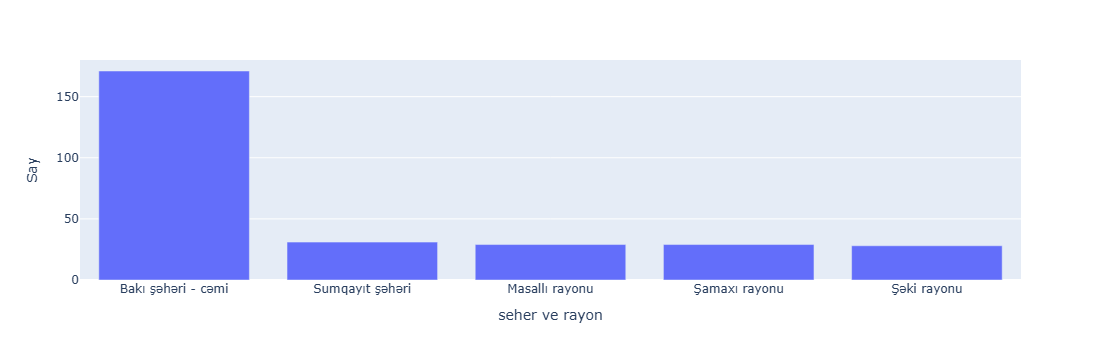

In [174]:
px.bar(data_frame = erazi_1_yas_2022.head(5) ,x ='seher ve rayon',y = 'Say')

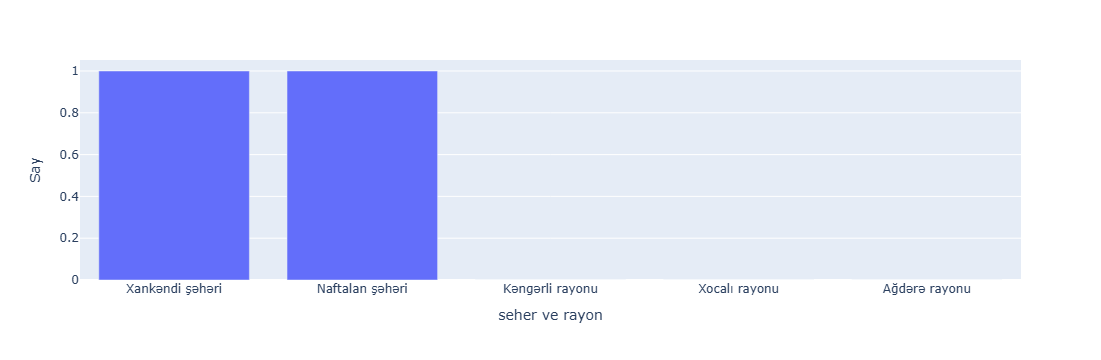

In [175]:
px.bar(data_frame = erazi_1_yas_2022.tail(5) ,x ='seher ve rayon',y = 'Say')

# 5-6 sual

In [177]:
sayi_2023 = pd.read_excel('004_11.xls')

In [178]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
sayi_2023

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,NaN,4.11. 2023-cü ildə Azərbaycan Respublikasını...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,(nəfər),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,İqtisadi rayonların və inzibati ərazi vahidlər...,Ölənlərin sayı - cəmi,o cümlədən yaş qrupları üzrə:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85+
5,NaN,Azərbaycan Respublikası - cəmi,60150,2395,262,267,456,552,594,828,1041,1246,1857,2956,5034,7665,8010,7146,4497,6322,9022
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,Bakı şəhəri - cəmi,14261,585,44,50,84,84,98,182,226,298,461,643,1206,1900,2036,1935,1290,1440,1699
8,NaN,o cümlədən:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,Binəqədi rayonu,1723,60,10,5,16,7,11,14,24,29,46,89,133,238,257,244,144,182,214


In [179]:
sayi_2023.drop([0,1,2,3,6,8,21,23,32,34,38,40,45,47,54,56,67,69,75,77,83,85,92,94,102,104,109,111,118,120,126,128],inplace=True)

In [180]:
sayi_23 = sayi_2023[['Unnamed: 1','Unnamed: 3','Unnamed: 19','Unnamed: 20']]

In [181]:
sayi_23.rename(columns = {'Unnamed: 1' : 'seher ve rayon','Unnamed: 3':'Usaq','Unnamed: 19':'80-84','Unnamed: 20':'85+'},inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9312\3444334889.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [182]:
sayi_23 = sayi_23.reset_index(drop=True)

In [183]:
sayi_23.drop(0,inplace=True)

In [184]:
sayi_23 = sayi_23.drop(sayi_23[sayi_23['seher ve rayon'].str.contains('cəmi', case=False)].index)

In [185]:
sayi_23['Ahil'] = sayi_23['80-84'] + sayi_23['85+']

sayi_23.drop(['80-84', '85+'], axis=1, inplace=True)

In [186]:
sayi_23 = sayi_23.replace('...','0')
sayi_23 = sayi_23.replace('......','0')

In [187]:
sayi_23['Usaq'] = sayi_23['Usaq'].astype(int)
sayi_23['Ahil'] = sayi_23['Ahil'].astype(int)

In [188]:
sayi_23 = sayi_23.reset_index(drop=True)

In [189]:
sayi_23

,seher ve rayon,Usaq,Ahil
0,Binəqədi rayonu,60,396
1,Xətai rayonu,94,367
2,Xəzər rayonu,35,204
3,Qaradağ rayonu,34,124
4,Nərimanov rayonu,31,252
5,Nəsimi rayonu,42,340
6,Nizami rayonu,32,269
7,Pirallahı rayonu,1,23
8,Sabunçu rayonu,35,334
9,Səbail rayonu,21,160


In [190]:
sayi_usaq_23 = sayi_23.sort_values(by = ['Usaq'],ascending = False)

In [191]:
sayi_ahil_23 = sayi_23.sort_values(by = ['Ahil'],ascending = False)

### Sual 5
Uşaq ölümünün ən çox (top 5) və an az (bottom 5) müşahidə olunduğu şəhər və
rayonları təsvir edin. Regional təhlildə ortaya çıxan əsas qanunauyğunluqları göstərin
və onların ehtimal olunan səbəblərini izah edin (yalnız 2022-ci il üzrə)
###Ən Çox 5
Uşaq ölümünün səbəbləri əhalinin sıxlığı və bu səbəbdən tibb müəssisələrinin çatışmazlığı ola bilər (Yasamal və Xətai rayonları Bakının mərkəzi rayonları olduğunu nəzərə alaraq)
Digər regionlarda isə səhiyyə xidmətlərinin səviyyə və keyfiyyətin az olması ilə əlaqədar ola bilər.
Məsələn, kənd rayonlarında səhiyyə imkanlarının məhdud olması uşaq ölüm nisbətini artıran faktorlardan biridir(Masallı və Lənkəran)

#### Ən Az 5
Uşaq ölümünün az olduğu şəhər və kəndlərin əsasən müharibə bölgələri olduğunu görə bilərik buda orada yaşayanəhalinin sayca ya az olmasından ya da heç olmamasından qaynaqlanırri

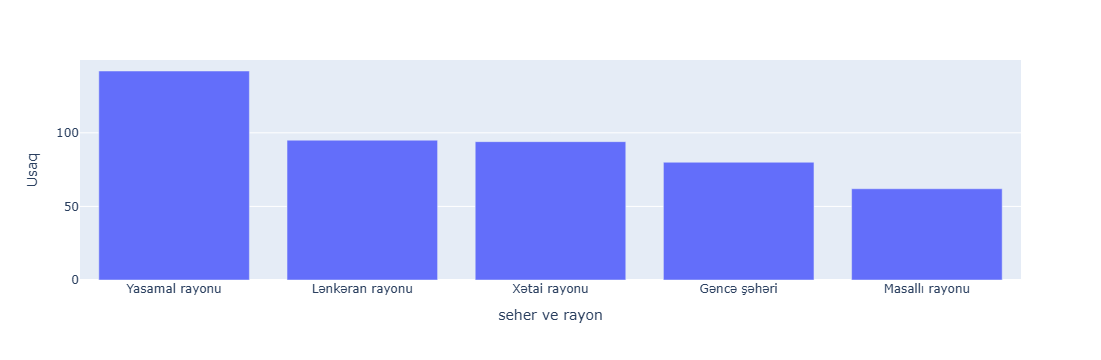

In [192]:
px.bar(data_frame = sayi_usaq_23.head(5) ,x ='seher ve rayon',y = 'Usaq')

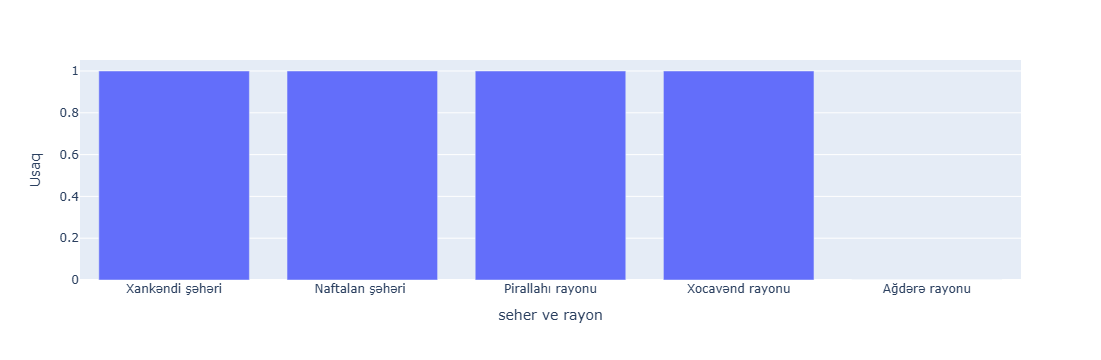

In [193]:
px.bar(data_frame = sayi_usaq_23.tail(5) ,x ='seher ve rayon',y = 'Usaq')

### Sual 6
Ahıl yaşda ölümün ən çox (top 5) və an az (bottom 5) müşahidə olunduğu şəhər və
rayonları təsvir edin. Regional təhlildə ortaya çıxan əsas qanunauyğunluqları göstərin
və onların ehtimal olunan səbəblərini izah edin (yalnız 2022-ci il üzrə);
###Analiz nəticələri

Azərbaycanda ahıl yaşda ölüm nisbətləri bölgələr üzrə fərqlənir. Bu fərqlərin əsas səbəbləri sosial-iqtisadi, ətraf mühit və həyat tərzi amilləri ola bilər. Aşağı gəlirli insanların tibbi xidmətlərə çıxışının məhdud olması, siqaret və alkoqol kimi zərərli vərdişlərin geniş yayılması, eləcə də hava çirkliliyi və suyun keyfiyyəti kimi ekoloji faktorlar yaşlı əhalinin sağlamlığına mənfi təsir göstərir. Bölgələrarası bu fərqləri azaltmaq üçün səhiyyə xidmətlərinin əlçatanlığını artırmaq, maarifləndirmə kampaniyaları təşkil etmək və ekoloji problemləri həll etmək vacibdir. 5

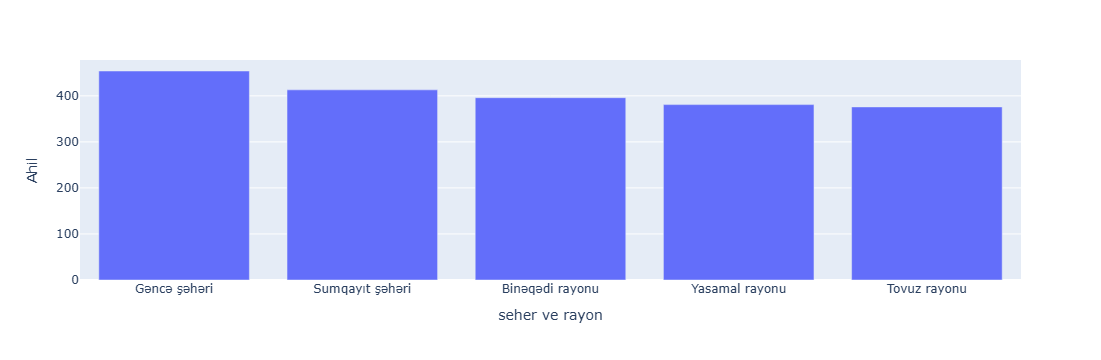

In [194]:
px.bar(data_frame = sayi_ahil_23.head(5) ,x ='seher ve rayon',y = 'Ahil')

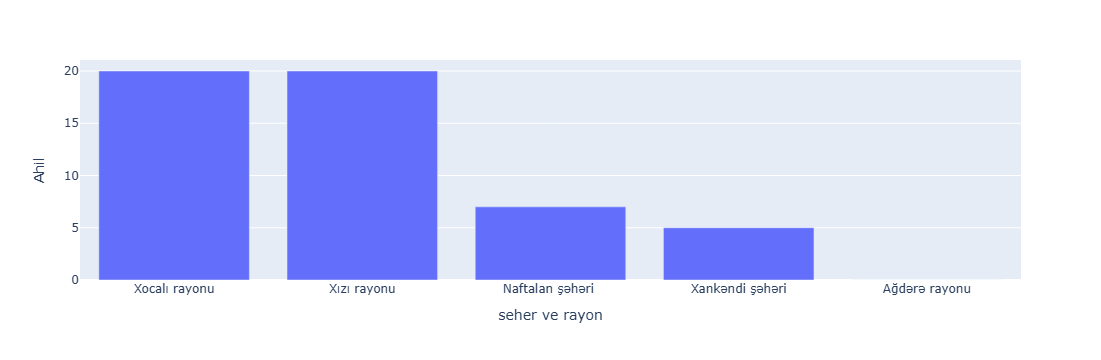

In [195]:
px.bar(data_frame = sayi_ahil_23.tail(5) ,x ='seher ve rayon',y = 'Ahil')

# 7ci sual

In [197]:
sebeb_olum = pd.read_excel('005_1-2.xls',sheet_name = '5.1.')

In [198]:
sebeb_olum

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
0,NaN,5.1. Səbəblər üzrə ölənlərin sayı,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,(nəfər),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Əsas səbəblər,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,NaN,NaN
4,NaN,Şəhər və kənd yerləri üzrə - cəmi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,Bütün səbəblərdən ölənlərin sayı,42819,44659,51258,52809,54921,50828,48242,46962,46299,46295,46701,45284,46522,49001,49568,51962,52248,53655,52710,52514,53580,53762,55017,54383,55648,54697,56648,57109,57250,55916,75647,76878,60810,60150,NaN,NaN
6,NaN,o cümlədən:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,- bəzi infeksion və parazitar xəstəliklərdən,1896,1500,1643,1900,2131,2279,1933,1896,1726,1828,1574,1532,1402,1294,1111,1102,908,995,899,865,1013,875,580,597,472,510,564,814,755,662,5875,6677,1896,778,NaN,NaN
8,NaN,- yenitörəmələrdən,4805,4813,5132,4932,5017,4761,4709,4811,4944,5214,5081,5455,5859,6248,6105,6381,6517,6650,6515,6910,6633,5999,5886,6383,6982,7278,8252,8665,8718,8819,9879,8509,8369,9818,NaN,NaN
9,NaN,- qan və qanyaradıçı orqanların xəstəlikləri v...,236,188,197,240,244,251,234,228,208,178,163,187,185,216,126,144,111,119,76,104,70,112,91,89,74,51,67,132,121,75,53,66,73,81,NaN,NaN


In [199]:
alpha = sebeb_olum.iloc[[3, 5,  7, 8, 12, 13, 14, 23]]

In [200]:
alpha


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
3,NaN,Əsas səbəblər,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,NaN,NaN
5,NaN,Bütün səbəblərdən ölənlərin sayı,42819,44659,51258,52809,54921,50828,48242,46962,46299,46295,46701,45284,46522,49001,49568,51962,52248,53655,52710,52514,53580,53762,55017,54383,55648,54697,56648,57109,57250,55916,75647,76878,60810,60150,NaN,NaN
7,NaN,- bəzi infeksion və parazitar xəstəliklərdən,1896,1500,1643,1900,2131,2279,1933,1896,1726,1828,1574,1532,1402,1294,1111,1102,908,995,899,865,1013,875,580,597,472,510,564,814,755,662,5875,6677,1896,778,NaN,NaN
8,NaN,- yenitörəmələrdən,4805,4813,5132,4932,5017,4761,4709,4811,4944,5214,5081,5455,5859,6248,6105,6381,6517,6650,6515,6910,6633,5999,5886,6383,6982,7278,8252,8665,8718,8819,9879,8509,8369,9818,NaN,NaN
12,NaN,- sinir sisteminin xəstəliklərindən,643,771,840,873,886,867,913,959,903,880,793,931,814,941,549,621,525,603,980,687,789,1284,1338,985,1095,1047,822,960,864,848,740,2520,2455,2146,NaN,NaN
13,NaN,- qan dövranı sisteminin xəstəliklərindən,20728,21978,23118,25016,24858,25767,24765,24163,24681,25181,26205,25267,26505,27960,28488,29392,29712,30355,31128,32072,32554,32835,34832,34379,33291,32825,34093,33663,33909,32471,41228,41708,34423,33183,NaN,NaN
14,NaN,- tənəffüs sistemi xəstəliklərindən,5893,6316,6735,7229,7301,6527,5742,5323,4631,4352,4207,3519,3196,3136,3208,3069,2860,3725,2851,2309,2377,2185,1743,1529,1971,1712,1815,1839,1826,1854,3149,4115,1280,1369,NaN,NaN
23,NaN,"- travmalar, zəhərlənmələr və xarici səbəbləri...",3206,3321,7067,5906,7271,3524,2856,2652,2487,2195,2097,1978,1869,2097,2249,2698,2686,3007,2444,2369,2529,2460,2467,2234,2827,2646,2731,2769,2772,2789,6060,2993,2914,3177,NaN,NaN


In [201]:
alpha.drop(columns = ['Unnamed: 0', 'Unnamed: 36', 'Unnamed: 37'],axis=1, inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9312\1764523733.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [202]:
alpha = alpha.set_index('Unnamed: 1').T

In [203]:
alpha

Unnamed: 1,Əsas səbəblər,Bütün səbəblərdən ölənlərin sayı,- bəzi infeksion və parazitar xəstəliklərdən,- yenitörəmələrdən,- sinir sisteminin xəstəliklərindən,- qan dövranı sisteminin xəstəliklərindən,- tənəffüs sistemi xəstəliklərindən,"- travmalar, zəhərlənmələr və xarici səbəblərin təsirinin digər nəticələrindən"
Unnamed: 2,1990,42819,1896,4805,643,20728,5893,3206
Unnamed: 3,1991,44659,1500,4813,771,21978,6316,3321
Unnamed: 4,1992,51258,1643,5132,840,23118,6735,7067
Unnamed: 5,1993,52809,1900,4932,873,25016,7229,5906
Unnamed: 6,1994,54921,2131,5017,886,24858,7301,7271
Unnamed: 7,1995,50828,2279,4761,867,25767,6527,3524
Unnamed: 8,1996,48242,1933,4709,913,24765,5742,2856
Unnamed: 9,1997,46962,1896,4811,959,24163,5323,2652
Unnamed: 10,1998,46299,1726,4944,903,24681,4631,2487
Unnamed: 11,1999,46295,1828,5214,880,25181,4352,2195


In [204]:
alpha = alpha.reset_index(drop=True)

In [205]:
alpha.rename(columns={'Əsas səbəblər': 'İl'}, inplace=True)


In [206]:
alpha

Unnamed: 1,İl,Bütün səbəblərdən ölənlərin sayı,- bəzi infeksion və parazitar xəstəliklərdən,- yenitörəmələrdən,- sinir sisteminin xəstəliklərindən,- qan dövranı sisteminin xəstəliklərindən,- tənəffüs sistemi xəstəliklərindən,"- travmalar, zəhərlənmələr və xarici səbəblərin təsirinin digər nəticələrindən"
0,1990,42819,1896,4805,643,20728,5893,3206
1,1991,44659,1500,4813,771,21978,6316,3321
2,1992,51258,1643,5132,840,23118,6735,7067
3,1993,52809,1900,4932,873,25016,7229,5906
4,1994,54921,2131,5017,886,24858,7301,7271
5,1995,50828,2279,4761,867,25767,6527,3524
6,1996,48242,1933,4709,913,24765,5742,2856
7,1997,46962,1896,4811,959,24163,5323,2652
8,1998,46299,1726,4944,903,24681,4631,2487
9,1999,46295,1828,5214,880,25181,4352,2195


In [207]:
alpha.rename(columns = {'- bəzi infeksion və parazitar xəstəliklərdən' : 'infeksion_xestelikler', 
                             '- yenitörəmələrdən' : 'yenitoremeler',
                             '- sinir sisteminin xəstəliklərindən' : 'sinir_sistemi_xestelikleri',
                             ' - qan dövranı sisteminin xəstəliklərindən' : 'qan_dovrani_xestelilkleri', 
                             '- tənəffüs sistemi xəstəliklərindən' : 'teneffus_xestelikleri',
                             '- travmalar, zəhərlənmələr və xarici səbəblərin təsirinin digər nəticələrindən' : 'travma_zeherlenme',
                             'Bütün səbəblərdən ölənlərin sayı' : 'Cemi'},inplace=True)

In [208]:
alpha = alpha.astype(int)

### Sual 7 
Ölüm sayının ölümə səbəb olan əsas xəstəlik növləri üzrə faiz nisbətinin son 20 il
ərzində dəyişmə dinamikasını təsvir edin. Bu dinamikada əhəmiyyətli dəyişikliklər
olubmu? Müşahidə etdiyiniz əsas tendensiyaları göstərin və onların ehtimal olunan
səbəblərini izah edi#### Analiz nəticələri (Mənbə: Chatgpt)n


Əsas Tendensiyalar:

İnfeksion Xəstəliklər: İnfeksion xəstəliklərdən ölümlərdə əhəmiyyətli bir azalma müşahidə olunub ki, bu da ictimai sağlamlıq tədbirlərinin və vaksinasiya proqramlarının yaxşılaşması ilə əlaqəlidir.

Neoplazmalar (Xərçənglər): Xərçəng səbəbindən ölümlərdə davamlı artım qeydə alınıb, bu isə yaşlanan əhali və həyat tərzi dəyişiklikləri ilə bağlıdır.

Sinir Sistemi Xəstəlikləri: Sinir sistemi xəstəliklərindən ölümlər dalğalanmalar göstərir, bu da diaqnostika və müalicədəki irəliləyişlərdən təsirlənə bilər.

Kardiovaskulyar Xəstəliklər: Kardiovaskulyar xəstəliklər ölümlərin əsas səbəbləri arasında qalmaqdadır və stabil nisbətlər nümayiş etdirir, bu da hipertoniya və diabet kimi risk faktorlarına diqqət yetirilməsinin zəruriliyini göstərir.

Tənəffüs Xəstəlikləri: Tənəffüs xəstəliklərindən ölümlərdə azalma tendensiyası mövcuddur ki, bu da hava keyfiyyətinin yaxşılaşması və sağlamlıq məlumatlarının artması ilə bağlıdır.

Zədələr və Z отравленияlar: Zədələr və z отравленияlardan ölümlərdə azalma müşahidə olunmuşdur ki, bu da təhlükəsizlik tənzimləmələrinin gücləndirilməsi və ictimai məlumatlandırma kampaniyaları ilə əlaqədardır.

Nəticə: Bu tendensiyalar, ictimai sağlamlıq və səhiyyəyə çıxışdakı irəliləyişləri göstərsə də, xroniki xəstəliklərlə bağlı davam edən problemləri də ortaya qoyur. Gələcək səylər, hədəflənmiş sağlamlıq təşəbbüslərinə, həyat tərzi dəyişikliklərinə və səhiyyəyə çıxışın artırılmasına yönəlməlidir ki, ölüm nisbətlərini daha da azaltmaq mümkün olsun.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9312\3843514000.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9312\3843514000.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9312\3843514000.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

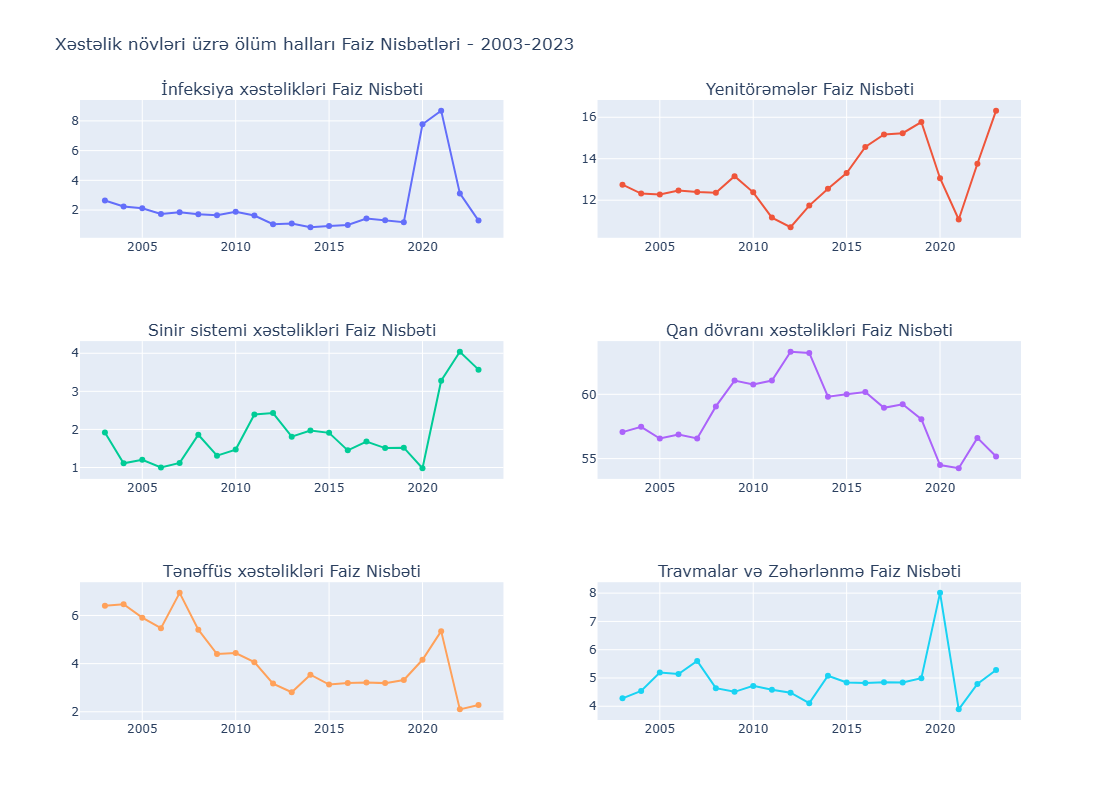

In [209]:

df_filtered = alpha[(alpha['İl'] >= 2003) & (alpha['İl'] <= 2023)]

df_filtered['infeksion_faiz'] = round((df_filtered['infeksion_xestelikler'] / df_filtered['Cemi']) * 100, 2)
df_filtered['yenitoremeler_faiz'] = round((df_filtered['yenitoremeler'] / df_filtered['Cemi']) * 100, 2)
df_filtered['sinir_sistemi_faiz'] = round((df_filtered['sinir_sistemi_xestelikleri'] / df_filtered['Cemi']) * 100, 2)
df_filtered['qan_dovrani_faiz'] = round((df_filtered['qan_dovrani_xestelilkleri'] / df_filtered['Cemi']) * 100, 2)
df_filtered['teneffus_faiz'] = round((df_filtered['teneffus_xestelikleri'] / df_filtered['Cemi']) * 100, 2)
df_filtered['travma_faiz'] = round((df_filtered['travma_zeherlenme'] / df_filtered['Cemi']) * 100, 2)

fig = make_subplots(rows=3, cols=2, subplot_titles=(
    'İnfeksiya xəstəlikləri Faiz Nisbəti', 'Yenitörəmələr Faiz Nisbəti',
    'Sinir sistemi xəstəlikləri Faiz Nisbəti', 'Qan dövranı xəstəlikləri Faiz Nisbəti',
    'Tənəffüs xəstəlikləri Faiz Nisbəti', 'Travmalar və Zəhərlənmə Faiz Nisbəti'))

fig.add_trace(go.Scatter(x=df_filtered['İl'], y=df_filtered['infeksion_faiz'], mode='lines+markers', name='İnfeksiya Faiz Nisbəti'), row=1, col=1)
fig.add_trace(go.Scatter(x=df_filtered['İl'], y=df_filtered['yenitoremeler_faiz'], mode='lines+markers', name='Yenitörəmələr Faiz Nisbəti'), row=1, col=2)
fig.add_trace(go.Scatter(x=df_filtered['İl'], y=df_filtered['sinir_sistemi_faiz'], mode='lines+markers', name='Sinir sistemi Faiz Nisbəti'), row=2, col=1)
fig.add_trace(go.Scatter(x=df_filtered['İl'], y=df_filtered['qan_dovrani_faiz'], mode='lines+markers', name='Qan dövranı Faiz Nisbəti'), row=2, col=2)
fig.add_trace(go.Scatter(x=df_filtered['İl'], y=df_filtered['teneffus_faiz'], mode='lines+markers', name='Tənəffüs Faiz Nisbəti'), row=3, col=1)
fig.add_trace(go.Scatter(x=df_filtered['İl'], y=df_filtered['travma_faiz'], mode='lines+markers', name='Travmalar Faiz Nisbəti'), row=3, col=2)

fig.update_layout(title_text="Xəstəlik növləri üzrə ölüm halları Faiz Nisbətləri - 2003-2023", height=800, showlegend=False)

fig.show()


# 8ci sual

In [211]:

omega = alpha.drop(['İl', 'Cemi'], axis=1)

# Faiz nisbətini hesablamaq üçün bir döngü istifadə edin
for column in omega.columns:
    # Hər sütun üçün faiz nisbətini hesablayın
    omega[f'{column}_faiz'] = round((omega[column] / alpha['Cemi']) * 100, 2)

# Nəticələri yoxlamaq
omega

Unnamed: 1,infeksion_xestelikler,yenitoremeler,sinir_sistemi_xestelikleri,qan_dovrani_xestelilkleri,teneffus_xestelikleri,travma_zeherlenme,infeksion_xestelikler_faiz,yenitoremeler_faiz,sinir_sistemi_xestelikleri_faiz,qan_dovrani_xestelilkleri_faiz,teneffus_xestelikleri_faiz,travma_zeherlenme_faiz
0,1896,4805,643,20728,5893,3206,4.43,11.22,1.50,48.41,13.76,7.49
1,1500,4813,771,21978,6316,3321,3.36,10.78,1.73,49.21,14.14,7.44
2,1643,5132,840,23118,6735,7067,3.21,10.01,1.64,45.10,13.14,13.79
3,1900,4932,873,25016,7229,5906,3.60,9.34,1.65,47.37,13.69,11.18
4,2131,5017,886,24858,7301,7271,3.88,9.13,1.61,45.26,13.29,13.24
5,2279,4761,867,25767,6527,3524,4.48,9.37,1.71,50.69,12.84,6.93
6,1933,4709,913,24765,5742,2856,4.01,9.76,1.89,51.33,11.90,5.92
7,1896,4811,959,24163,5323,2652,4.04,10.24,2.04,51.45,11.33,5.65
8,1726,4944,903,24681,4631,2487,3.73,10.68,1.95,53.31,10.00,5.37
9,1828,5214,880,25181,4352,2195,3.95,11.26,1.90,54.39,9.40,4.74


In [212]:
beta

NameError: name 'beta' is not defined